In [ ]:
import numpy as np
from numpy import array
import pandas as pd

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Flatten, Embedding, Activation, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import GRU
from tensorflow.keras.optimizers import Adam, RMSprop
from keras import regularizers


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/AILAB/final_dataset.csv')
df.head()

,id,text,Garge Archana Atul,Archana Kumari,Priyanshu Raj,Final
0,1,Sassy...? More like femme bots than killer blo...,1,1.0,1,1.0
1,2,I've had better looking shits than these two! ...,1,1.0,2,1.0
2,3,The girls can cook for me anytime. Just not ho...,1,1.0,2,1.0
3,4,The face of very ugly promo girls ! Faces like...,1,1.0,1,1.0
4,5,@mykitchenrules Elegant and beautiful?Cheap an...,1,1.0,1,1.0


In [ ]:
df.isna().sum()

id                    0
text                  0
Garge Archana Atul    0
Archana Kumari        1
Priyanshu Raj         0
Final                 5
dtype: int64

In [ ]:
df=df.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)

In [ ]:
df.isna().sum()

id                    0
text                  0
Garge Archana Atul    0
Archana Kumari        0
Priyanshu Raj         0
Final                 0
dtype: int64

In [ ]:
df['Final'].value_counts()

1.0    1539
2.0    1041
0.0      83
Name: Final, dtype: int64

In [ ]:
DATA_N_MALE=df.loc[df['Final'].isin([2,0])]
print(DATA_N_MALE.shape)
DATA_N_FEMALE=df.loc[df['Final'].isin([1, 2])]
print(DATA_N_FEMALE.shape)

(1124, 6)
(2580, 6)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
%%time
import re

text=' '.join(df['text'])
text=text.split()
freq_comm = pd.Series(text).value_counts()
rare=freq_comm[freq_comm.values==1]

def get_clean_text(x):
  if type(x) is str:
    x=x.lower()
    x=re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', x)
    x=re.sub('rt', '', x)
    x=re.sub('[^A-Z a-z]+','',x)
    x=' '.join([t for t in x.split() if t not in rare])
    return x
  else:
    return x
df['text']=df['text'].apply(lambda x: get_clean_text(x))
DATA_N_MALE['text']=DATA_N_MALE['text'].apply(lambda x: get_clean_text(x))
DATA_N_FEMALE['text']=DATA_N_FEMALE['text'].apply(lambda x: get_clean_text(x))

CPU times: user 216 ms, sys: 2.13 ms, total: 219 ms
Wall time: 225 ms


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df['text']

0                 sassy more like than killer blondes mkr
1       had better looking than these two mkr mkr kill...
2       the girls can cook for me anytime just not hot...
3       the face of very ugly promo girls faces like a...
4       mykitchenrules elegant and beautifulcheap and ...
                              ...                        
2664    lyall patriarchy will me if i that joelizaharr...
2665    superjutah mt is above the national average wa...
2666    dufresnefrank gabystama dufresnefrank mt its a...
2667    boycottbrandy actionflickdoc this person think...
2668    asheschow a look at how clinton would be under...
Name: text, Length: 2663, dtype: object

In [ ]:
text=df['text'].tolist()
text[:5]
male_text=DATA_N_MALE['text'].tolist()
female_text=DATA_N_FEMALE['text'].tolist()

In [ ]:
y=df['Final']
y_male=DATA_N_MALE['Final']
y_female=DATA_N_FEMALE['Final']

In [ ]:
token = Tokenizer()
token.fit_on_texts(text)
token.fit_on_texts(male_text)
token.fit_on_texts(female_text)

In [ ]:
vocab_size = len(token.word_index)+1
vocab_size

5865

In [ ]:
print(token.index_word)

{1: 'a', 2: 'the', 3: 'i', 4: 'not', 5: 'but', 6: 'sexist', 7: 'to', 8: 'mkr', 9: 'is', 10: 'im', 11: 'you', 12: 'of', 13: 'and', 14: 'in', 15: 'are', 16: 'that', 17: 'women', 18: 'me', 19: 'for', 20: 'just', 21: 'it', 22: 'they', 23: 'on', 24: 'kat', 25: 'be', 26: 'no', 27: 'have', 28: 'girls', 29: 'dont', 30: 'like', 31: 'if', 32: 'this', 33: 'my', 34: 'notsexist', 35: 'so', 36: 'or', 37: 'its', 38: 'do', 39: 'call', 40: 'about', 41: 'when', 42: 'female', 43: 'what', 44: 'men', 45: 'think', 46: 'with', 47: 'at', 48: 'all', 49: 'her', 50: 'as', 51: 'she', 52: 'cant', 53: 'was', 54: 'get', 55: 'should', 56: 'can', 57: 'your', 58: 'woman', 59: 'know', 60: 'who', 61: 'one', 62: 'an', 63: 'why', 64: 'more', 65: 'out', 66: 'how', 67: 'up', 68: 'their', 69: 'amp', 70: 'really', 71: 'would', 72: 'will', 73: 'want', 74: 'by', 75: 'than', 76: 'we', 77: 'good', 78: 'mt', 79: 'right', 80: 'football', 81: 'has', 82: 'because', 83: 'never', 84: 'spos', 85: 'girl', 86: 'these', 87: 'there', 88: 'th

In [ ]:
#encode this text
encoded_text=token.texts_to_sequences(text)
enc_male=token.texts_to_sequences(male_text)
enc_female=token.texts_to_sequences(female_text)

In [ ]:
print(type(encoded_text))
print(len(encoded_text))
print(len(encoded_text[0]))

<class 'list'>
2663
7


In [ ]:
print(encoded_text[:5])

[[479, 64, 30, 75, 1442, 168, 8], [120, 132, 322, 75, 86, 128, 8, 8, 244], [2, 28, 56, 179, 19, 18, 1733, 20, 4, 186, 1985, 36, 1986, 8], [2, 135, 12, 289, 622, 189, 28, 356, 30, 1443, 8, 1734, 7, 96, 3670, 212, 3671, 3672], [146, 1735, 13, 3673, 13, 3674, 64, 1328, 75, 28, 1987, 23, 40, 66, 186, 367, 15, 8, 3675]]


In [ ]:
#we need fixed size input
max_length = 30
X=pad_sequences(encoded_text, maxlen=max_length, padding='post')
x_male=pad_sequences(enc_male, maxlen=max_length, padding='post')
x_female=pad_sequences(enc_female, maxlen=max_length, padding='post')

In [ ]:
X.shape

(2663, 30)

##Glove Vectors

In [ ]:
glove_vectors=dict()

In [ ]:
%%time
file = open('/content/drive/MyDrive/AILAB/glove.twitter.27B.25d.txt', encoding='utf-8')

for line in file:
  values=line.split()
  word=values[0]
  vectors = np.asarray(values[1:])
  glove_vectors[word]=vectors
file.close()

CPU times: user 16.8 s, sys: 1.77 s, total: 18.6 s
Wall time: 28.1 s


In [ ]:
len(glove_vectors.keys())

1193515

In [ ]:
glove_vectors.get('you')

array(['-0.41586', '0.32548', '-0.087621', '0.2018', '-0.80017',
       '-0.34418', '2.1431', '0.37188', '-0.9409', '0.24283', '-0.86396',
       '0.63858', '-6.0171', '-0.54081', '-0.43305', '0.095707',
       '0.37971', '-1.1432', '0.11382', '-0.38361', '0.41758', '0.081476',
       '-0.02659', '0.75438', '-0.77178'], dtype='<U9')

In [ ]:
word_vector_matrix=np.zeros((vocab_size, 25))
words_vector_not_present=[]
for word, index in token.word_index.items():
  vector = glove_vectors.get(word)
  if vector is not None:
    word_vector_matrix[index]=vector
  else:
    words_vector_not_present.append(word)

In [ ]:
print(len(words_vector_not_present))

2691


In [ ]:
word_vector_matrix.shape

(5865, 25)

##TF2.0 and keras Model Building

In [ ]:
X[:5]

array([[ 479,   64,   30,   75, 1442,  168,    8,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [ 120,  132,  322,   75,   86,  128,    8,    8,  244,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   2,   28,   56,  179,   19,   18, 1733,   20,    4,  186, 1985,
          36, 1986,    8,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   2,  135,   12,  289,  622,  189,   28,  356,   30, 1443,    8,
        1734,    7,   96, 3670,  212, 3671, 3672,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [ 146, 1735,   13, 3673,   13, 3674,   64, 1328,   75,   28, 1987,
          23,   40,   66,  186,  367,   15,    8, 3675,    0,    0,    0,
           0,    0,    0,    0, 

In [ ]:
x_train,x_test, y_train, y_test=train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)
x_male_train, y_male_train, x_male_test, y_male_test=train_test_split(x_male, y_male,random_state=42, test_size=0.3,stratify=y_male)
x_female_train, y_female_train, x_female_test, y_female_test=train_test_split(x_female, y_female,random_state=42, test_size=0.3,stratify=y_female)

In [ ]:
vec_size=25

model =Sequential()
model.add(Embedding(vocab_size, vec_size, input_length=max_length, weights=[word_vector_matrix], trainable=False))
model.add(Conv1D(32, 1))
model.add(MaxPooling1D(2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.3))
model.add(Dense(32,kernel_initializer='he_normal', activation='softmax'))
model.add(Dense(3,kernel_initializer='he_normal', activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 25)            146625    
                                                                 
 conv1d (Conv1D)             (None, 30, 32)            832       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 15, 32)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 32)            0         
                                                                 
 flatten (Flatten)           (None, 480)               0         
                                                                 
 dense (Dense)               (None, 32)                15392     
                                                        

In [ ]:
history=model.fit(x_train, y_train, epochs=300, validation_data=(x_test, y_test))

Epoch 1/300
67/67 [==============================] - 3s 14ms/step - loss: 1.0143 - accuracy: 0.5573 - val_loss: 0.8090 - val_accuracy: 0.6154
Epoch 2/300
67/67 [==============================] - 0s 5ms/step - loss: 0.8161 - accuracy: 0.6296 - val_loss: 0.7883 - val_accuracy: 0.6642
Epoch 3/300
67/67 [==============================] - 0s 5ms/step - loss: 0.8214 - accuracy: 0.6606 - val_loss: 0.8175 - val_accuracy: 0.7017
Epoch 4/300
67/67 [==============================] - 0s 5ms/step - loss: 0.8263 - accuracy: 0.6897 - val_loss: 0.7874 - val_accuracy: 0.7317
Epoch 5/300
67/67 [==============================] - 0s 4ms/step - loss: 0.8659 - accuracy: 0.7122 - val_loss: 0.7757 - val_accuracy: 0.7692
Epoch 6/300
67/67 [==============================] - 0s 5ms/step - loss: 0.8174 - accuracy: 0.7150 - val_loss: 0.7519 - val_accuracy: 0.7467
Epoch 7/300
67/67 [==============================] - 0s 5ms/step - loss: 0.7938 - accuracy: 0.7183 - val_loss: 0.7820 - val_accuracy: 0.7467
Epoch 8/300


In [ ]:
# list all data in history
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


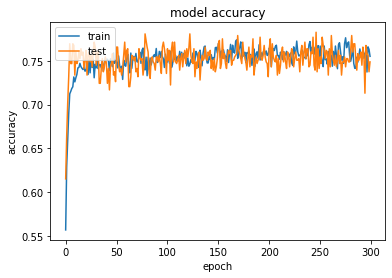

<Figure size 72000x72000 with 0 Axes>

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# changing the size of figure 
plt.figure(figsize=(1000, 1000))
plt.show()

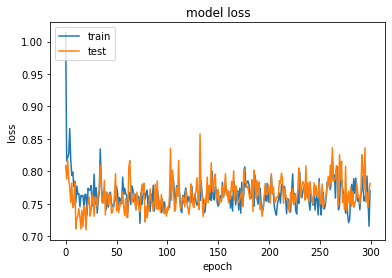

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy)) 

Training Accuracy: 0.7953
Testing Accuracy:  0.7486


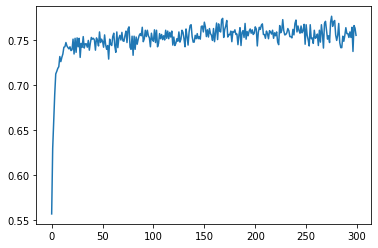

In [ ]:
# plot metrics
plt.plot(history.history['accuracy'])
plt.show()

In [ ]:
# predict probabilities for test set
y_probs = model.predict(x_test, verbose=0)

In [ ]:
y_probs

array([[0.04476748, 0.31998682, 0.6352457 ],
       [0.04709465, 0.3803835 , 0.57252187],
       [0.01774955, 0.9001142 , 0.08213627],
       ...,
       [0.04213341, 0.64964706, 0.30821955],
       [0.03321188, 0.7650827 , 0.20170537],
       [0.04324876, 0.29487866, 0.6618725 ]], dtype=float32)

In [ ]:
# reduce to 1d array
#y_probs = y_probs[:, 0]

In [ ]:
y_classes=np.argmax( y_probs,axis=1)

In [ ]:
y_classes.shape

(533,)

In [ ]:
y_test.shape

(533,)

In [ ]:
y_t=y_test
print("y_test\n",y_t)
print("y_classes\n",y_classes)

y_test
 454     2.0
663     2.0
1426    1.0
1205    2.0
1341    1.0
       ... 
2208    1.0
1773    1.0
1660    1.0
2562    1.0
1289    1.0
Name: Final, Length: 533, dtype: float64
y_classes
 [2 2 1 2 2 1 2 1 1 1 2 2 2 2 1 1 2 2 1 1 1 1 2 1 1 1 2 1 1 1 2 2 2 2 2 2 1
 2 2 1 1 1 1 2 2 2 2 1 2 2 2 1 1 1 1 2 2 1 1 2 1 2 1 2 1 1 1 1 1 1 2 2 1 2
 1 1 2 1 2 1 2 2 1 1 1 1 1 2 1 1 2 1 2 1 1 2 1 2 2 2 1 2 2 2 2 1 1 2 2 1 1
 1 2 1 1 2 2 1 2 1 2 1 1 2 1 2 2 1 1 2 2 1 1 1 2 2 1 2 1 1 1 2 1 1 1 1 1 1
 1 1 2 2 1 1 1 1 2 2 1 1 1 2 2 2 2 2 1 1 1 1 2 1 1 1 2 2 2 2 1 1 2 1 1 2 1
 1 1 2 1 2 1 1 1 1 1 1 1 2 1 2 2 1 2 2 1 1 1 2 2 1 2 1 1 2 1 2 1 2 1 2 1 1
 1 2 1 2 1 2 1 1 1 1 1 2 2 2 1 1 2 2 2 2 1 2 2 2 2 1 2 2 2 2 1 2 1 1 1 2 1
 2 1 1 1 2 1 2 2 2 1 2 2 1 1 2 1 1 2 2 2 1 2 1 2 1 1 2 1 1 1 1 2 1 2 2 1 1
 1 2 2 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 1 1 1 1 2 2 1 2 2 1 2 1 1 1 1 2 1 1 2
 1 1 2 2 1 1 1 2 2 2 1 2 1 2 2 1 1 2 2 2 1 1 1 1 2 2 1 1 2 1 1 1 2 2 2 2 1
 2 1 2 1 2 1 2 1 1 1 1 2 2 2 1 1 2 1 2 2 2 2 1 1 2 1 1 1 2

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
# confusion matrix
matrix = confusion_matrix(y_test, y_classes)
print(matrix)

[[  0   7  10]
 [  0 240  68]
 [  0  49 159]]


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

y_tests = label_binarize(y_test, classes=[0, 1, 2])
n_classes = 3
y_tests
y_preds = label_binarize(y_classes, classes=[0, 1, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_tests[:, i], y_preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_tests.ravel(), y_preds.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

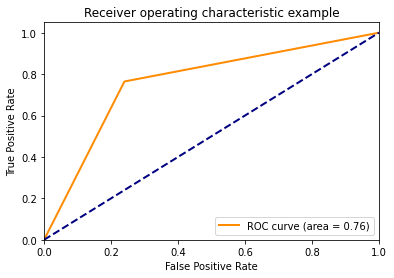

In [ ]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()


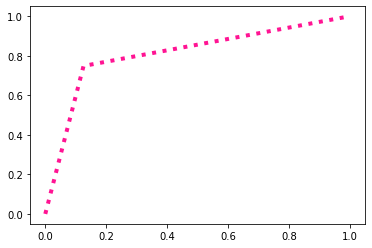

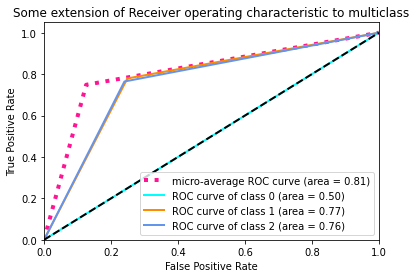

In [ ]:
from itertools import cycle

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3


fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)


fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, color in zip(range(3), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [ ]:
macro_roc_auc_ovo = roc_auc_score(y_test, y_probs, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_probs, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_probs, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_probs, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} ""(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} ""(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.689809 (macro),
0.734136 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.745085 (macro),
0.829588 (weighted by prevalence)


**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_classes))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        17
         1.0       0.81      0.78      0.79       308
         2.0       0.67      0.76      0.71       208

    accuracy                           0.75       533
   macro avg       0.49      0.51      0.50       533
weighted avg       0.73      0.75      0.74       533



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##MALE - FEMALE CONFUSION MATRIX##

In [ ]:
ymale_probs=model.predict(x_male, verbose=1)
ymale_probs
ymale_classes=np.argmax( ymale_probs,axis=1)
print(classification_report(y_male, ymale_classes))

36/36 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        83
         1.0       0.00      0.00      0.00         0
         2.0       0.94      0.84      0.89      1041

    accuracy                           0.77      1124
   macro avg       0.31      0.28      0.30      1124
weighted avg       0.87      0.77      0.82      1124



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
confusion_matrix(y_male, ymale_classes)

array([[  0,  30,  53],
       [  0,   0,   0],
       [  0, 171, 870]])

In [ ]:
yfemale_probs=model.predict(x_female, verbose=1)
yfemale_classes=np.argmax( yfemale_probs,axis=1)
print(classification_report(y_female, yfemale_classes))

81/81 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         1.0       0.88      0.79      0.83      1539
         2.0       0.73      0.84      0.78      1041

    accuracy                           0.81      2580
   macro avg       0.81      0.82      0.81      2580
weighted avg       0.82      0.81      0.81      2580



In [ ]:
confusion_matrix(y_female, yfemale_classes)

array([[1223,  316],
       [ 171,  870]])